In [84]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [85]:
clip1 = VideoFileClip("project_video.mp4")
crp = clip1.subclip(20, 26)
crp.write_videofile('part1.mp4', audio=False)
crp = clip1.subclip(37, 43)
crp.write_videofile('part2.mp4', audio=False)

In [86]:
filename = 'scripts/calibrate_camera.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/distortion_correct.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/thresholding.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/full_pipeline.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))


In [87]:
# Get the distortion corrector
mtx, dist = read_camera_calibration('files/camera_calibration.p')
distortion_correcter = CorrectDistortion(mtx, dist)

# Get the lane_extractor
lane_extractor = ExtractLanes(        
        abs_x_sobel_kernel=5, abs_x_thresh=(20, 100),
        abs_y_sobel_kernel=3, abs_y_thresh=(20, 100),
        mag_thresh_sobel_kernel=3, mag_thresh=(30, 100),
        dir_thresh_sobel_kernel=15, dir_thresh=(0.7, 1.3),
        color_s_thresh = (170, 255)
)

In [88]:
frame_processor = ProcessFrame(distortion_correcter, lane_extractor)
def process_image(img):
    try:
        processed_img = frame_processor.run(img)
        return processed_img
    except:
        return img

In [90]:
project_video_output = 'project_video_processed_v2.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
processed_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!


In [91]:
%time processed_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video project_video_processed_v2.mp4
[MoviePy] Writing video project_video_processed_v2.mp4



100%|█████████▉| 1260/1261 [05:57<00:00,  3.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_processed_v2.mp4 

CPU times: user 5min 38s, sys: 1min 23s, total: 7min 2s
Wall time: 5min 59s


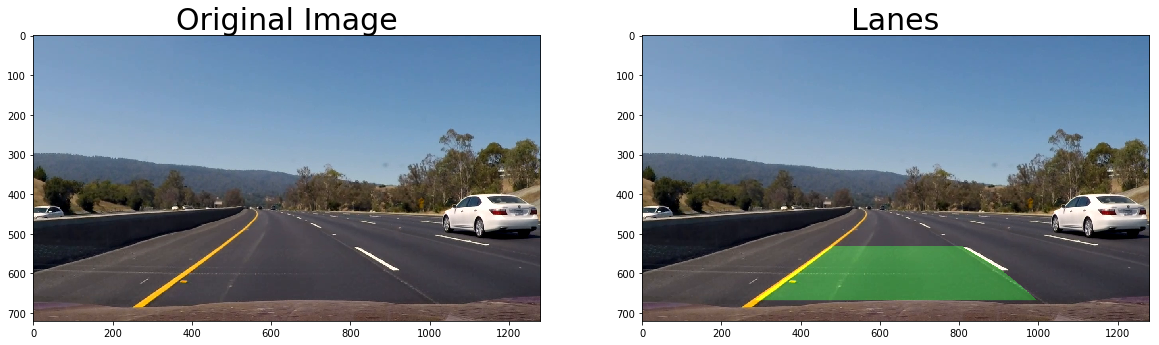

In [73]:
img= clip1.get_frame(10)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.set_title('Lanes', fontsize=30)
ax2.imshow(process_image(img))